# Probabilistic Methods (Discrete)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import env

**Anomaly Detection:** Identification of items, events or observations which is significantly different from the remaining data.

- Non-parametric approach
- Frequency or counting based
    - How many time a value of variable (e.g. ip address) shows up
    - More frequent - less likely to be an anomaly
    - Less frequent - more likely to be an anomaly
    - Calculate probability 

    
- Conditional probability 
    $$ {P(A|B) = }\frac{\text{P(A and B)}}{\text{P(B)}} $$
    
    
 Examples: 
- How many times we see an ip address in the dataset (count)
- What is probability of ip address showing up in the dataset (ip count / total observations)
- Conditional probability. Given an ip address, what is prob of a particular status(e.g authentication failure)

### Wrangle

The data comes from the webserver logs of the API. Each row is one request to the server

In [2]:
#read in data from sql
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/logs'
df = pd.read_sql('SELECT * FROM api_access', url)

In [3]:
#look at data
df

entry
0      97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] ...
1      97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] ...
2      97.105.19.58 - - [16/Apr/2019:19:34:44 +0000] ...
3      97.105.19.58 - - [16/Apr/2019:19:34:46 +0000] ...
4      97.105.19.58 - - [16/Apr/2019:19:34:48 +0000] ...
...                                                  ...
13969  97.105.19.58 - - [17/Apr/2019:12:55:12 +0000] ...
13970  97.105.19.58 - - [17/Apr/2019:12:55:12 +0000] ...
13971  97.105.19.58 - - [17/Apr/2019:12:55:13 +0000] ...
13972  97.105.19.58 - - [17/Apr/2019:12:55:13 +0000] ...
13973  97.105.19.58 - - [17/Apr/2019:12:55:14 +0000] ...

[13974 rows x 1 columns]

In [4]:
#look at entry data more in-depth
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13974 entries, 0 to 13973
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   entry   13974 non-null  object
dtypes: object(1)
memory usage: 109.3+ KB


In [5]:
df.entry[0]

'97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] "GET /api/v1/sales?page=81 HTTP/1.1" 200 512495 "-" "python-requests/2.21.0"'

In [6]:
#split entry data on spaces
df.entry[0].split()

['97.105.19.58',
 '-',
 '-',
 '[16/Apr/2019:19:34:42',
 '+0000]',
 '"GET',
 '/api/v1/sales?page=81',
 'HTTP/1.1"',
 '200',
 '512495',
 '"-"',
 '"python-requests/2.21.0"']

In [7]:
#split whole dataframe
# df = 
df.entry.str.split(expand=True)

0  1  2                      3       4     5   \
0      97.105.19.58  -  -  [16/Apr/2019:19:34:42  +0000]  "GET   
1      97.105.19.58  -  -  [16/Apr/2019:19:34:42  +0000]  "GET   
2      97.105.19.58  -  -  [16/Apr/2019:19:34:44  +0000]  "GET   
3      97.105.19.58  -  -  [16/Apr/2019:19:34:46  +0000]  "GET   
4      97.105.19.58  -  -  [16/Apr/2019:19:34:48  +0000]  "GET   
...             ... .. ..                    ...     ...   ...   
13969  97.105.19.58  -  -  [17/Apr/2019:12:55:12  +0000]  "GET   
13970  97.105.19.58  -  -  [17/Apr/2019:12:55:12  +0000]  "GET   
13971  97.105.19.58  -  -  [17/Apr/2019:12:55:13  +0000]  "GET   
13972  97.105.19.58  -  -  [17/Apr/2019:12:55:13  +0000]  "GET   
13973  97.105.19.58  -  -  [17/Apr/2019:12:55:14  +0000]  "GET   

                          6          7    8       9   ...    14    15    16  \
0      /api/v1/sales?page=81  HTTP/1.1"  200  512495  ...  None  None  None   
1              /api/v1/items  HTTP/1.1"  200    3561  ...  None  None  None   
2      /api/v1/sales?page=82  HTTP/1.1"  200  510103  ...  None  None  None   
3      /api/v1/sales?page=83  HTTP/1.1"  200  510003  ...  None  None  None   
4      /api/v1/sales?page=84  HTTP/1.1"  200  511963  ...  None  None  None   
...                      ...        ...  ...     ...  ...   ...   ...   ...   
13969  /api/v1/sales?page=62  HTTP/1.1"  200  511544  ...  None  None  None   
13970  /api/v1/sales?page=65  HTTP/1.1"  200  511201  ...  None  None  None   
13971  /api/v1/sales?page=73  HTTP/1.1"  200  511781  ...  None  None  None   
13972  /api/v1/sales?page=69  HTTP/1.1"  200  510136  ...  None  None  None   
13973  /api/v1/sales?page=71  HTTP/1.1"  200  510166  ...  None  None  None   

         17    18    19    20    21    22    23  
0      None  None  None  None  None  None  None  
1      None  None  None  None  None  None  None  
2      None  None  None  None  None  None  None  
3      None  None  None  None  None  None  None  
4      None  None  None  None  None  None  None  
...     ...   ...   ...   ...   ...   ...   ...  
13969  None  None  None  None  None  None  None  
13970  None  None  None  None  None  None  None  
13971  None  None  None  None  None  None  None  
13972  None  None  None  None  None  None  None  
13973  None  None  None  None  None  None  None  

[13974 rows x 24 columns]

In [8]:
df = df.entry.str.split(expand=True)

In [9]:
#look at end columns using loc
df.loc[13_000]

0               173.173.113.51
1                            -
2                            -
3        [17/Apr/2019:03:40:30
4                       +0000]
5                         "GET
6         /api/v1/sales?page=8
7                    HTTP/1.1"
8                          200
9                       501714
10                         "-"
11    "python-requests/2.21.0"
12                        None
13                        None
14                        None
15                        None
16                        None
17                        None
18                        None
19                        None
20                        None
21                        None
22                        None
23                        None
Name: 13000, dtype: object

In [10]:
df.loc[:,11:]

11    12    13    14    15    16    17    18  \
0      "python-requests/2.21.0"  None  None  None  None  None  None  None   
1      "python-requests/2.21.0"  None  None  None  None  None  None  None   
2      "python-requests/2.21.0"  None  None  None  None  None  None  None   
3      "python-requests/2.21.0"  None  None  None  None  None  None  None   
4      "python-requests/2.21.0"  None  None  None  None  None  None  None   
...                         ...   ...   ...   ...   ...   ...   ...   ...   
13969  "python-requests/2.21.0"  None  None  None  None  None  None  None   
13970  "python-requests/2.21.0"  None  None  None  None  None  None  None   
13971  "python-requests/2.21.0"  None  None  None  None  None  None  None   
13972  "python-requests/2.21.0"  None  None  None  None  None  None  None   
13973  "python-requests/2.21.0"  None  None  None  None  None  None  None   

         19    20    21    22    23  
0      None  None  None  None  None  
1      None  None  None  None  None  
2      None  None  None  None  None  
3      None  None  None  None  None  
4      None  None  None  None  None  
...     ...   ...   ...   ...   ...  
13969  None  None  None  None  None  
13970  None  None  None  None  None  
13971  None  None  None  None  None  
13972  None  None  None  None  None  
13973  None  None  None  None  None  

[13974 rows x 13 columns]

In [11]:
#combine end columns together & save back into 11
df[11] = df[11].str.strip('"')
df[11]

0        python-requests/2.21.0
1        python-requests/2.21.0
2        python-requests/2.21.0
3        python-requests/2.21.0
4        python-requests/2.21.0
                  ...          
13969    python-requests/2.21.0
13970    python-requests/2.21.0
13971    python-requests/2.21.0
13972    python-requests/2.21.0
13973    python-requests/2.21.0
Name: 11, Length: 13974, dtype: object

In [12]:
#combine using lambda
df.loc[:,11:].apply(lambda rows: ' '.join(rows.values.astype('str'))
                , axis= 1).str.replace('None', '').str.strip()

0        python-requests/2.21.0
1        python-requests/2.21.0
2        python-requests/2.21.0
3        python-requests/2.21.0
4        python-requests/2.21.0
                  ...          
13969    python-requests/2.21.0
13970    python-requests/2.21.0
13971    python-requests/2.21.0
13972    python-requests/2.21.0
13973    python-requests/2.21.0
Length: 13974, dtype: object

In [13]:
#combine using lambda
df[11] = df.loc[:,11:].apply(lambda rows: ' '.join(rows.values.astype('str'))
                , axis= 1).str.replace('None', '').str.strip()

In [14]:
#remove end columns using loc
df.loc[:,:11]

0  1  2                      3       4     5   \
0      97.105.19.58  -  -  [16/Apr/2019:19:34:42  +0000]  "GET   
1      97.105.19.58  -  -  [16/Apr/2019:19:34:42  +0000]  "GET   
2      97.105.19.58  -  -  [16/Apr/2019:19:34:44  +0000]  "GET   
3      97.105.19.58  -  -  [16/Apr/2019:19:34:46  +0000]  "GET   
4      97.105.19.58  -  -  [16/Apr/2019:19:34:48  +0000]  "GET   
...             ... .. ..                    ...     ...   ...   
13969  97.105.19.58  -  -  [17/Apr/2019:12:55:12  +0000]  "GET   
13970  97.105.19.58  -  -  [17/Apr/2019:12:55:12  +0000]  "GET   
13971  97.105.19.58  -  -  [17/Apr/2019:12:55:13  +0000]  "GET   
13972  97.105.19.58  -  -  [17/Apr/2019:12:55:13  +0000]  "GET   
13973  97.105.19.58  -  -  [17/Apr/2019:12:55:14  +0000]  "GET   

                          6          7    8       9    10  \
0      /api/v1/sales?page=81  HTTP/1.1"  200  512495  "-"   
1              /api/v1/items  HTTP/1.1"  200    3561  "-"   
2      /api/v1/sales?page=82  HTTP/1.1"  200  510103  "-"   
3      /api/v1/sales?page=83  HTTP/1.1"  200  510003  "-"   
4      /api/v1/sales?page=84  HTTP/1.1"  200  511963  "-"   
...                      ...        ...  ...     ...  ...   
13969  /api/v1/sales?page=62  HTTP/1.1"  200  511544  "-"   
13970  /api/v1/sales?page=65  HTTP/1.1"  200  511201  "-"   
13971  /api/v1/sales?page=73  HTTP/1.1"  200  511781  "-"   
13972  /api/v1/sales?page=69  HTTP/1.1"  200  510136  "-"   
13973  /api/v1/sales?page=71  HTTP/1.1"  200  510166  "-"   

                           11  
0      python-requests/2.21.0  
1      python-requests/2.21.0  
2      python-requests/2.21.0  
3      python-requests/2.21.0  
4      python-requests/2.21.0  
...                       ...  
13969  python-requests/2.21.0  
13970  python-requests/2.21.0  
13971  python-requests/2.21.0  
13972  python-requests/2.21.0  
13973  python-requests/2.21.0  

[13974 rows x 12 columns]

In [15]:
#drop other unnecesary columns
df = df.loc[:,:11]

In [16]:
df = df.drop(columns= [1,2,4,10])
df

0                      3     5                      6   \
0      97.105.19.58  [16/Apr/2019:19:34:42  "GET  /api/v1/sales?page=81   
1      97.105.19.58  [16/Apr/2019:19:34:42  "GET          /api/v1/items   
2      97.105.19.58  [16/Apr/2019:19:34:44  "GET  /api/v1/sales?page=82   
3      97.105.19.58  [16/Apr/2019:19:34:46  "GET  /api/v1/sales?page=83   
4      97.105.19.58  [16/Apr/2019:19:34:48  "GET  /api/v1/sales?page=84   
...             ...                    ...   ...                    ...   
13969  97.105.19.58  [17/Apr/2019:12:55:12  "GET  /api/v1/sales?page=62   
13970  97.105.19.58  [17/Apr/2019:12:55:12  "GET  /api/v1/sales?page=65   
13971  97.105.19.58  [17/Apr/2019:12:55:13  "GET  /api/v1/sales?page=73   
13972  97.105.19.58  [17/Apr/2019:12:55:13  "GET  /api/v1/sales?page=69   
13973  97.105.19.58  [17/Apr/2019:12:55:14  "GET  /api/v1/sales?page=71   

              7    8       9                       11  
0      HTTP/1.1"  200  512495  python-requests/2.21.0  
1      HTTP/1.1"  200    3561  python-requests/2.21.0  
2      HTTP/1.1"  200  510103  python-requests/2.21.0  
3      HTTP/1.1"  200  510003  python-requests/2.21.0  
4      HTTP/1.1"  200  511963  python-requests/2.21.0  
...          ...  ...     ...                     ...  
13969  HTTP/1.1"  200  511544  python-requests/2.21.0  
13970  HTTP/1.1"  200  511201  python-requests/2.21.0  
13971  HTTP/1.1"  200  511781  python-requests/2.21.0  
13972  HTTP/1.1"  200  510136  python-requests/2.21.0  
13973  HTTP/1.1"  200  510166  python-requests/2.21.0  

[13974 rows x 8 columns]

In [17]:
#rename columns
df = df.rename(columns={0: 'ip',
                   3: 'timestamp',
                   5: 'request_method',
                   6:'request_path',
                   7:'http_version',
                   8:'status_code',
                   9:'bytes',
                   11:'user_agent'})

In [18]:
df

ip              timestamp request_method  \
0      97.105.19.58  [16/Apr/2019:19:34:42           "GET   
1      97.105.19.58  [16/Apr/2019:19:34:42           "GET   
2      97.105.19.58  [16/Apr/2019:19:34:44           "GET   
3      97.105.19.58  [16/Apr/2019:19:34:46           "GET   
4      97.105.19.58  [16/Apr/2019:19:34:48           "GET   
...             ...                    ...            ...   
13969  97.105.19.58  [17/Apr/2019:12:55:12           "GET   
13970  97.105.19.58  [17/Apr/2019:12:55:12           "GET   
13971  97.105.19.58  [17/Apr/2019:12:55:13           "GET   
13972  97.105.19.58  [17/Apr/2019:12:55:13           "GET   
13973  97.105.19.58  [17/Apr/2019:12:55:14           "GET   

                request_path http_version status_code   bytes  \
0      /api/v1/sales?page=81    HTTP/1.1"         200  512495   
1              /api/v1/items    HTTP/1.1"         200    3561   
2      /api/v1/sales?page=82    HTTP/1.1"         200  510103   
3      /api/v1/sales?page=83    HTTP/1.1"         200  510003   
4      /api/v1/sales?page=84    HTTP/1.1"         200  511963   
...                      ...          ...         ...     ...   
13969  /api/v1/sales?page=62    HTTP/1.1"         200  511544   
13970  /api/v1/sales?page=65    HTTP/1.1"         200  511201   
13971  /api/v1/sales?page=73    HTTP/1.1"         200  511781   
13972  /api/v1/sales?page=69    HTTP/1.1"         200  510136   
13973  /api/v1/sales?page=71    HTTP/1.1"         200  510166   

                   user_agent  
0      python-requests/2.21.0  
1      python-requests/2.21.0  
2      python-requests/2.21.0  
3      python-requests/2.21.0  
4      python-requests/2.21.0  
...                       ...  
13969  python-requests/2.21.0  
13970  python-requests/2.21.0  
13971  python-requests/2.21.0  
13972  python-requests/2.21.0  
13973  python-requests/2.21.0  

[13974 rows x 8 columns]

In [19]:
#strip extra quotes
df.timestamp.str.strip('[').str.replace(':', ' ',1)

0        16/Apr/2019 19:34:42
1        16/Apr/2019 19:34:42
2        16/Apr/2019 19:34:44
3        16/Apr/2019 19:34:46
4        16/Apr/2019 19:34:48
                 ...         
13969    17/Apr/2019 12:55:12
13970    17/Apr/2019 12:55:12
13971    17/Apr/2019 12:55:13
13972    17/Apr/2019 12:55:13
13973    17/Apr/2019 12:55:14
Name: timestamp, Length: 13974, dtype: object

In [20]:
df.timestamp = df.timestamp.str.strip('[').str.replace(':', ' ',1)

In [21]:
#format timestamp
df.head()

ip             timestamp request_method           request_path  \
0  97.105.19.58  16/Apr/2019 19:34:42           "GET  /api/v1/sales?page=81   
1  97.105.19.58  16/Apr/2019 19:34:42           "GET          /api/v1/items   
2  97.105.19.58  16/Apr/2019 19:34:44           "GET  /api/v1/sales?page=82   
3  97.105.19.58  16/Apr/2019 19:34:46           "GET  /api/v1/sales?page=83   
4  97.105.19.58  16/Apr/2019 19:34:48           "GET  /api/v1/sales?page=84   

  http_version status_code   bytes              user_agent  
0    HTTP/1.1"         200  512495  python-requests/2.21.0  
1    HTTP/1.1"         200    3561  python-requests/2.21.0  
2    HTTP/1.1"         200  510103  python-requests/2.21.0  
3    HTTP/1.1"         200  510003  python-requests/2.21.0  
4    HTTP/1.1"         200  511963  python-requests/2.21.0

In [22]:
df.timestamp = pd.to_datetime(df.timestamp)

In [23]:
# Synthetic data
new = pd.DataFrame([
    ["95.31.18.119", "21/Apr/2019 10:02:41", "GET", "/api/v1/items/", "HTTP/1.1", '200', 1153005, "python-requests/2.21.0"],
    ["95.31.16.121", "17/Apr/2019 19:36:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", '301', 1005, "python-requests/2.21.0"],
    ["97.105.15.120", "18/Apr/2019 19:42:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", '301', 2560, "python-requests/2.21.0"],
    ["97.105.19.58", "19/Apr/2019 19:42:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", '200', 2056327, "python-requests/2.21.0"],
], columns=df.columns)

new

ip             timestamp request_method            request_path  \
0   95.31.18.119  21/Apr/2019 10:02:41            GET          /api/v1/items/   
1   95.31.16.121  17/Apr/2019 19:36:41            GET  /api/v1/sales?page=79/   
2  97.105.15.120  18/Apr/2019 19:42:41            GET  /api/v1/sales?page=79/   
3   97.105.19.58  19/Apr/2019 19:42:41            GET  /api/v1/sales?page=79/   

  http_version status_code    bytes              user_agent  
0     HTTP/1.1         200  1153005  python-requests/2.21.0  
1     HTTP/1.1         301     1005  python-requests/2.21.0  
2     HTTP/1.1         301     2560  python-requests/2.21.0  
3     HTTP/1.1         200  2056327  python-requests/2.21.0

In [24]:
#add to initial dataframe
pd.concat([df,new])

ip             timestamp request_method  \
0       97.105.19.58   2019-04-16 19:34:42           "GET   
1       97.105.19.58   2019-04-16 19:34:42           "GET   
2       97.105.19.58   2019-04-16 19:34:44           "GET   
3       97.105.19.58   2019-04-16 19:34:46           "GET   
4       97.105.19.58   2019-04-16 19:34:48           "GET   
...              ...                   ...            ...   
13973   97.105.19.58   2019-04-17 12:55:14           "GET   
0       95.31.18.119  21/Apr/2019 10:02:41            GET   
1       95.31.16.121  17/Apr/2019 19:36:41            GET   
2      97.105.15.120  18/Apr/2019 19:42:41            GET   
3       97.105.19.58  19/Apr/2019 19:42:41            GET   

                 request_path http_version status_code    bytes  \
0       /api/v1/sales?page=81    HTTP/1.1"         200   512495   
1               /api/v1/items    HTTP/1.1"         200     3561   
2       /api/v1/sales?page=82    HTTP/1.1"         200   510103   
3       /api/v1/sales?page=83    HTTP/1.1"         200   510003   
4       /api/v1/sales?page=84    HTTP/1.1"         200   511963   
...                       ...          ...         ...      ...   
13973   /api/v1/sales?page=71    HTTP/1.1"         200   510166   
0              /api/v1/items/     HTTP/1.1         200  1153005   
1      /api/v1/sales?page=79/     HTTP/1.1         301     1005   
2      /api/v1/sales?page=79/     HTTP/1.1         301     2560   
3      /api/v1/sales?page=79/     HTTP/1.1         200  2056327   

                   user_agent  
0      python-requests/2.21.0  
1      python-requests/2.21.0  
2      python-requests/2.21.0  
3      python-requests/2.21.0  
4      python-requests/2.21.0  
...                       ...  
13973  python-requests/2.21.0  
0      python-requests/2.21.0  
1      python-requests/2.21.0  
2      python-requests/2.21.0  
3      python-requests/2.21.0  

[13978 rows x 8 columns]

In [25]:
#strip extra quotes
df.request_method = df.request_method.str.strip('"')
df.http_version = df.http_version.str.strip('"')

In [26]:
pd.to_datetime(new.timestamp)

0   2019-04-21 10:02:41
1   2019-04-17 19:36:41
2   2019-04-18 19:42:41
3   2019-04-19 19:42:41
Name: timestamp, dtype: datetime64[ns]

In [27]:
new.timestamp = pd.to_datetime(new.timestamp)

In [28]:
df= pd.concat([df,new])

In [29]:
#convert timestamp & set as index
df = df.set_index('timestamp')
df

ip request_method            request_path  \
timestamp                                                                   
2019-04-16 19:34:42   97.105.19.58            GET   /api/v1/sales?page=81   
2019-04-16 19:34:42   97.105.19.58            GET           /api/v1/items   
2019-04-16 19:34:44   97.105.19.58            GET   /api/v1/sales?page=82   
2019-04-16 19:34:46   97.105.19.58            GET   /api/v1/sales?page=83   
2019-04-16 19:34:48   97.105.19.58            GET   /api/v1/sales?page=84   
...                            ...            ...                     ...   
2019-04-17 12:55:14   97.105.19.58            GET   /api/v1/sales?page=71   
2019-04-21 10:02:41   95.31.18.119            GET          /api/v1/items/   
2019-04-17 19:36:41   95.31.16.121            GET  /api/v1/sales?page=79/   
2019-04-18 19:42:41  97.105.15.120            GET  /api/v1/sales?page=79/   
2019-04-19 19:42:41   97.105.19.58            GET  /api/v1/sales?page=79/   

                    http_version status_code    bytes              user_agent  
timestamp                                                                      
2019-04-16 19:34:42     HTTP/1.1         200   512495  python-requests/2.21.0  
2019-04-16 19:34:42     HTTP/1.1         200     3561  python-requests/2.21.0  
2019-04-16 19:34:44     HTTP/1.1         200   510103  python-requests/2.21.0  
2019-04-16 19:34:46     HTTP/1.1         200   510003  python-requests/2.21.0  
2019-04-16 19:34:48     HTTP/1.1         200   511963  python-requests/2.21.0  
...                          ...         ...      ...                     ...  
2019-04-17 12:55:14     HTTP/1.1         200   510166  python-requests/2.21.0  
2019-04-21 10:02:41     HTTP/1.1         200  1153005  python-requests/2.21.0  
2019-04-17 19:36:41     HTTP/1.1         301     1005  python-requests/2.21.0  
2019-04-18 19:42:41     HTTP/1.1         301     2560  python-requests/2.21.0  
2019-04-19 19:42:41     HTTP/1.1         200  2056327  python-requests/2.21.0  

[13978 rows x 7 columns]

In [30]:
#make additional size_mb column
df['size_mb'] = df['bytes'].astype(int) / 1024 / 1024

## Detecting Anomalies in Discrete Variables

- **count**: the number of times each unique value appears in the dataset
- **frequencies**: the number of times each unique value appears in the dataset as a percentage of the total; the count divided by the total number of observations

In [31]:
#look at ip counts
df.ip.value_counts()

97.105.19.58      11999
173.173.113.51     1059
72.181.113.170      613
72.181.105.81       246
68.201.219.223       21
24.26.242.9          21
35.175.171.137        2
52.87.230.102         2
70.121.214.34         2
52.90.165.200         1
95.31.16.121          1
95.31.18.119          1
45.23.250.16          1
52.91.30.150          1
34.207.64.242         1
3.88.129.158          1
54.172.14.223         1
3.92.201.136          1
35.174.209.2          1
54.145.52.184         1
34.229.70.250         1
97.105.15.120         1
Name: ip, dtype: int64

In [32]:
#save ip_counts into separate dataframe
ip_counts = pd.DataFrame(df.ip.value_counts()).reset_index().\
rename(columns={'index':'ip','ip':'count'})

In [33]:
# calculate probabity for each ip 
df.ip.value_counts(normalize=True)

97.105.19.58      0.858420
173.173.113.51    0.075762
72.181.113.170    0.043855
72.181.105.81     0.017599
68.201.219.223    0.001502
24.26.242.9       0.001502
35.175.171.137    0.000143
52.87.230.102     0.000143
70.121.214.34     0.000143
52.90.165.200     0.000072
95.31.16.121      0.000072
95.31.18.119      0.000072
45.23.250.16      0.000072
52.91.30.150      0.000072
34.207.64.242     0.000072
3.88.129.158      0.000072
54.172.14.223     0.000072
3.92.201.136      0.000072
35.174.209.2      0.000072
54.145.52.184     0.000072
34.229.70.250     0.000072
97.105.15.120     0.000072
Name: ip, dtype: float64

In [34]:
# ip_counts['probability'] = 
ip_counts.set_index('ip')

count
ip                   
97.105.19.58    11999
173.173.113.51   1059
72.181.113.170    613
72.181.105.81     246
68.201.219.223     21
24.26.242.9        21
35.175.171.137      2
52.87.230.102       2
70.121.214.34       2
52.90.165.200       1
95.31.16.121        1
95.31.18.119        1
45.23.250.16        1
52.91.30.150        1
34.207.64.242       1
3.88.129.158        1
54.172.14.223       1
3.92.201.136        1
35.174.209.2        1
54.145.52.184       1
34.229.70.250       1
97.105.15.120       1

In [35]:
ip_counts['prob'] = df.ip.value_counts(normalize=True).reset_index().ip

In [36]:
ip_counts

ip  count      prob
0     97.105.19.58  11999  0.858420
1   173.173.113.51   1059  0.075762
2   72.181.113.170    613  0.043855
3    72.181.105.81    246  0.017599
4   68.201.219.223     21  0.001502
5      24.26.242.9     21  0.001502
6   35.175.171.137      2  0.000143
7    52.87.230.102      2  0.000143
8    70.121.214.34      2  0.000143
9    52.90.165.200      1  0.000072
10    95.31.16.121      1  0.000072
11    95.31.18.119      1  0.000072
12    45.23.250.16      1  0.000072
13    52.91.30.150      1  0.000072
14   34.207.64.242      1  0.000072
15    3.88.129.158      1  0.000072
16   54.172.14.223      1  0.000072
17    3.92.201.136      1  0.000072
18    35.174.209.2      1  0.000072
19   54.145.52.184      1  0.000072
20   34.229.70.250      1  0.000072
21   97.105.15.120      1  0.000072

#### How many unique IP addresses are there?

In [37]:
#number of unique ip addresses
df.ip.nunique()

22

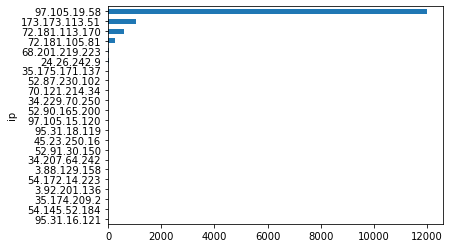

In [38]:
#plot them
ip_counts.set_index('ip')['count'].sort_values().plot.barh()
plt.show()

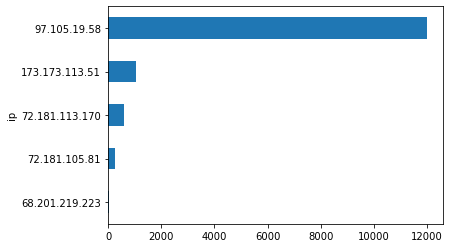

In [39]:
#plot them - top 5
ip_counts.set_index('ip')['count'].head().sort_values().plot.barh()
plt.show()

### Conditional Probabilities

HTTP Status Codes

- 200: ok
- 3xx: redirects
- 4xx: client level errors -- the requester did something wrong
- 5xx: server level errors -- the server did something wrong

- What is probability of a certain status code given an IP address?
$$ {P(A|B) = }\frac{\text{P(A and B)}}{\text{P(B)}} $$

In [40]:
#prob(A|B) = prob(A & B)/prob(B)

In [41]:
#prob(B)
df.groupby('ip').size()

ip
173.173.113.51     1059
24.26.242.9          21
3.88.129.158          1
3.92.201.136          1
34.207.64.242         1
34.229.70.250         1
35.174.209.2          1
35.175.171.137        2
45.23.250.16          1
52.87.230.102         2
52.90.165.200         1
52.91.30.150          1
54.145.52.184         1
54.172.14.223         1
68.201.219.223       21
70.121.214.34         2
72.181.105.81       246
72.181.113.170      613
95.31.16.121          1
95.31.18.119          1
97.105.15.120         1
97.105.19.58      11999
dtype: int64

In [42]:
#prob(B)
Pb = df.groupby('ip').size() /len(df)
Pb

ip
173.173.113.51    0.075762
24.26.242.9       0.001502
3.88.129.158      0.000072
3.92.201.136      0.000072
34.207.64.242     0.000072
34.229.70.250     0.000072
35.174.209.2      0.000072
35.175.171.137    0.000143
45.23.250.16      0.000072
52.87.230.102     0.000143
52.90.165.200     0.000072
52.91.30.150      0.000072
54.145.52.184     0.000072
54.172.14.223     0.000072
68.201.219.223    0.001502
70.121.214.34     0.000143
72.181.105.81     0.017599
72.181.113.170    0.043855
95.31.16.121      0.000072
95.31.18.119      0.000072
97.105.15.120     0.000072
97.105.19.58      0.858420
dtype: float64

In [43]:
#prob(A & B)
# Pab = 
df.groupby(['ip', 'status_code']).size() /len(df)

ip              status_code
173.173.113.51  200            0.075762
24.26.242.9     200            0.001502
3.88.129.158    200            0.000072
3.92.201.136    200            0.000072
34.207.64.242   200            0.000072
34.229.70.250   200            0.000072
35.174.209.2    200            0.000072
35.175.171.137  200            0.000143
45.23.250.16    200            0.000072
52.87.230.102   200            0.000143
52.90.165.200   200            0.000072
52.91.30.150    200            0.000072
54.145.52.184   200            0.000072
54.172.14.223   200            0.000072
68.201.219.223  200            0.001502
70.121.214.34   200            0.000143
72.181.105.81   200            0.017599
72.181.113.170  200            0.043712
                499            0.000143
95.31.16.121    301            0.000072
95.31.18.119    200            0.000072
97.105.15.120   301            0.000072
97.105.19.58    200            0.857419
                499            0.001002
dtype: float

In [44]:
# Given a particular ip, what is probability of a certain status code
#same thing, diferent method, using groupby and normalizing value counts
df.groupby('ip').status_code.value_counts(normalize=True)

ip              status_code
173.173.113.51  200            1.000000
24.26.242.9     200            1.000000
3.88.129.158    200            1.000000
3.92.201.136    200            1.000000
34.207.64.242   200            1.000000
34.229.70.250   200            1.000000
35.174.209.2    200            1.000000
35.175.171.137  200            1.000000
45.23.250.16    200            1.000000
52.87.230.102   200            1.000000
52.90.165.200   200            1.000000
52.91.30.150    200            1.000000
54.145.52.184   200            1.000000
54.172.14.223   200            1.000000
68.201.219.223  200            1.000000
70.121.214.34   200            1.000000
72.181.105.81   200            1.000000
72.181.113.170  200            0.996737
                499            0.003263
95.31.16.121    301            1.000000
95.31.18.119    200            1.000000
97.105.15.120   301            1.000000
97.105.19.58    200            0.998833
                499            0.001167
Name: status

In [45]:
status_code_ip = df.groupby('ip').status_code.value_counts(normalize=True).\
                rename('proba_status_code_ip').reset_index()
status_code_ip.head()

ip status_code  proba_status_code_ip
0  173.173.113.51         200                   1.0
1     24.26.242.9         200                   1.0
2    3.88.129.158         200                   1.0
3    3.92.201.136         200                   1.0
4   34.207.64.242         200                   1.0

#### Which IP addresses give us multiple status codes?

In [46]:
status_code_ip [status_code_ip.proba_status_code_ip < 1]

ip status_code  proba_status_code_ip
17  72.181.113.170         200              0.996737
18  72.181.113.170         499              0.003263
22    97.105.19.58         200              0.998833
23    97.105.19.58         499              0.001167

#### Let's investigate the '72.181.113.170' address

In [47]:
df [df.ip == '72.181.113.170'].sort_values('status_code', 
                                           ascending=False)

ip request_method            request_path  \
timestamp                                                                    
2019-04-17 02:48:36  72.181.113.170            GET    /api/v1/sales?page=8   
2019-04-17 03:42:44  72.181.113.170            GET  /api/v1/sales?page=133   
2019-04-17 03:42:17  72.181.113.170            GET  /api/v1/sales?page=120   
2019-04-17 03:42:01  72.181.113.170            GET  /api/v1/sales?page=113   
2019-04-17 03:42:03  72.181.113.170            GET  /api/v1/sales?page=114   
...                             ...            ...                     ...   
2019-04-17 03:28:07  72.181.113.170            GET  /api/v1/sales?page=100   
2019-04-17 03:28:08  72.181.113.170            GET  /api/v1/sales?page=101   
2019-04-17 03:28:11  72.181.113.170            GET  /api/v1/sales?page=102   
2019-04-17 03:28:13  72.181.113.170            GET  /api/v1/sales?page=103   
2019-04-17 03:52:08  72.181.113.170            GET  /api/v1/sales?page=183   

                    http_version status_code   bytes              user_agent  \
timestamp                                                                      
2019-04-17 02:48:36     HTTP/1.1         499       0  python-requests/2.21.0   
2019-04-17 03:42:44     HTTP/1.1         499       0  python-requests/2.21.0   
2019-04-17 03:42:17     HTTP/1.1         200  510681  python-requests/2.21.0   
2019-04-17 03:42:01     HTTP/1.1         200  511094  python-requests/2.21.0   
2019-04-17 03:42:03     HTTP/1.1         200  511291  python-requests/2.21.0   
...                          ...         ...     ...                     ...   
2019-04-17 03:28:07     HTTP/1.1         200  512674  python-requests/2.21.0   
2019-04-17 03:28:08     HTTP/1.1         200  510509  python-requests/2.21.0   
2019-04-17 03:28:11     HTTP/1.1         200  512612  python-requests/2.21.0   
2019-04-17 03:28:13     HTTP/1.1         200  512764  python-requests/2.21.0   
2019-04-17 03:52:08     HTTP/1.1         200  308243  python-requests/2.21.0   

                      size_mb  
timestamp                      
2019-04-17 02:48:36  0.000000  
2019-04-17 03:42:44  0.000000  
2019-04-17 03:42:17  0.487023  
2019-04-17 03:42:01  0.487417  
2019-04-17 03:42:03  0.487605  
...                       ...  
2019-04-17 03:28:07  0.488924  
2019-04-17 03:28:08  0.486859  
2019-04-17 03:28:11  0.488865  
2019-04-17 03:28:13  0.489010  
2019-04-17 03:52:08  0.293963  

[613 rows x 8 columns]

#### What cases don't have a 200 status code?

In [48]:
status_code_ip [status_code_ip.status_code != '200']

ip status_code  proba_status_code_ip
18  72.181.113.170         499              0.003263
19    95.31.16.121         301              1.000000
21   97.105.15.120         301              1.000000
23    97.105.19.58         499              0.001167

#### Add these probabilities to original events to detect anomalous events

In [49]:
status_code_ip.head()

ip status_code  proba_status_code_ip
0  173.173.113.51         200                   1.0
1     24.26.242.9         200                   1.0
2    3.88.129.158         200                   1.0
3    3.92.201.136         200                   1.0
4   34.207.64.242         200                   1.0

In [53]:
status_code_ip

ip status_code  proba_status_code_ip
0   173.173.113.51         200              1.000000
1      24.26.242.9         200              1.000000
2     3.88.129.158         200              1.000000
3     3.92.201.136         200              1.000000
4    34.207.64.242         200              1.000000
5    34.229.70.250         200              1.000000
6     35.174.209.2         200              1.000000
7   35.175.171.137         200              1.000000
8     45.23.250.16         200              1.000000
9    52.87.230.102         200              1.000000
10   52.90.165.200         200              1.000000
11    52.91.30.150         200              1.000000
12   54.145.52.184         200              1.000000
13   54.172.14.223         200              1.000000
14  68.201.219.223         200              1.000000
15   70.121.214.34         200              1.000000
16   72.181.105.81         200              1.000000
17  72.181.113.170         200              0.996737
18  72.181.113.170         499              0.003263
19    95.31.16.121         301              1.000000
20    95.31.18.119         200              1.000000
21   97.105.15.120         301              1.000000
22    97.105.19.58         200              0.998833
23    97.105.19.58         499              0.001167

In [50]:
df.head()

ip request_method           request_path  \
timestamp                                                                 
2019-04-16 19:34:42  97.105.19.58            GET  /api/v1/sales?page=81   
2019-04-16 19:34:42  97.105.19.58            GET          /api/v1/items   
2019-04-16 19:34:44  97.105.19.58            GET  /api/v1/sales?page=82   
2019-04-16 19:34:46  97.105.19.58            GET  /api/v1/sales?page=83   
2019-04-16 19:34:48  97.105.19.58            GET  /api/v1/sales?page=84   

                    http_version status_code   bytes              user_agent  \
timestamp                                                                      
2019-04-16 19:34:42     HTTP/1.1         200  512495  python-requests/2.21.0   
2019-04-16 19:34:42     HTTP/1.1         200    3561  python-requests/2.21.0   
2019-04-16 19:34:44     HTTP/1.1         200  510103  python-requests/2.21.0   
2019-04-16 19:34:46     HTTP/1.1         200  510003  python-requests/2.21.0   
2019-04-16 19:34:48     HTTP/1.1         200  511963  python-requests/2.21.0   

                      size_mb  
timestamp                      
2019-04-16 19:34:42  0.488753  
2019-04-16 19:34:42  0.003396  
2019-04-16 19:34:44  0.486472  
2019-04-16 19:34:46  0.486377  
2019-04-16 19:34:48  0.488246

In [ ]:
df.reset_index().merge(status_code_ip, how='left', on=['ip','status_code']).set_index

In [70]:
df = df.merge(status_code_ip, how='left', on=['ip','status_code'])
df.head()

ip request_method           request_path http_version  \
0  97.105.19.58           "GET  /api/v1/sales?page=81    HTTP/1.1"   
1  97.105.19.58           "GET          /api/v1/items    HTTP/1.1"   
2  97.105.19.58           "GET  /api/v1/sales?page=82    HTTP/1.1"   
3  97.105.19.58           "GET  /api/v1/sales?page=83    HTTP/1.1"   
4  97.105.19.58           "GET  /api/v1/sales?page=84    HTTP/1.1"   

  status_code    size                 browser  proba_status_code_ip  
0         200  512495  python-requests/2.21.0              0.998833  
1         200    3561  python-requests/2.21.0              0.998833  
2         200  510103  python-requests/2.21.0              0.998833  
3         200  510003  python-requests/2.21.0              0.998833  
4         200  511963  python-requests/2.21.0              0.998833

#### Which events have the lowest probability of happening?

In [71]:
df [df.proba_status_code_ip < .1]

ip request_method            request_path http_version  \
1745     97.105.19.58           "GET    /api/v1/sales?page=2    HTTP/1.1"   
1819     97.105.19.58           "GET   /api/v1/sales?page=21    HTTP/1.1"   
4242     97.105.19.58           "GET    /api/v1/sales?page=2    HTTP/1.1"   
4405     97.105.19.58           "GET   /api/v1/sales?page=29    HTTP/1.1"   
4790     97.105.19.58           "GET           /api/v1/items    HTTP/1.1"   
4862     97.105.19.58           "GET           /api/v1/items    HTTP/1.1"   
4871     97.105.19.58           "GET           /api/v1/items    HTTP/1.1"   
5520     97.105.19.58           "GET           /api/v1/items    HTTP/1.1"   
5539     97.105.19.58           "GET    /api/v1/sales?page=2    HTTP/1.1"   
6860     97.105.19.58           "GET  /api/v1/sales?page=115    HTTP/1.1"   
6934     97.105.19.58           "GET   /api/v1/sales?page=47    HTTP/1.1"   
8267     97.105.19.58           "GET   /api/v1/sales?page=25    HTTP/1.1"   
8866     97.105.19.58           "GET   /api/v1/sales?page=80    HTTP/1.1"   
10838    97.105.19.58           "GET   /api/v1/sales?page=69    HTTP/1.1"   
12598  72.181.113.170           "GET    /api/v1/sales?page=8    HTTP/1.1"   
13106  72.181.113.170           "GET  /api/v1/sales?page=133    HTTP/1.1"   

      status_code size                 browser  proba_status_code_ip  
1745          499    0  python-requests/2.20.1              0.001167  
1819          499    0  python-requests/2.20.1              0.001167  
4242          499    0  python-requests/2.21.0              0.001167  
4405          499    0  python-requests/2.21.0              0.001167  
4790          499    0  python-requests/2.21.0              0.001167  
4862          499    0  python-requests/2.21.0              0.001167  
4871          499    0  python-requests/2.21.0              0.001167  
5520          499    0  python-requests/2.21.0              0.001167  
5539          499    0  python-requests/2.21.0              0.001167  
6860          499    0  python-requests/2.20.1              0.001167  
6934          499    0  python-requests/2.20.1              0.001167  
8267          499    0  python-requests/2.21.0              0.001167  
8866          499    0  python-requests/2.21.0              0.001167  
10838         499    0  python-requests/2.21.0              0.001167  
12598         499    0  python-requests/2.21.0              0.003263  
13106         499    0  python-requests/2.21.0              0.003263

> All low probability combinations are now easily identifiable with all additional data intact